In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [37]:
# Define output folder
output_folder = "./evaluation/overshoot"

# Create directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

output_filename = os.path.join(output_folder, f'production_cap_{timestamp}.png')

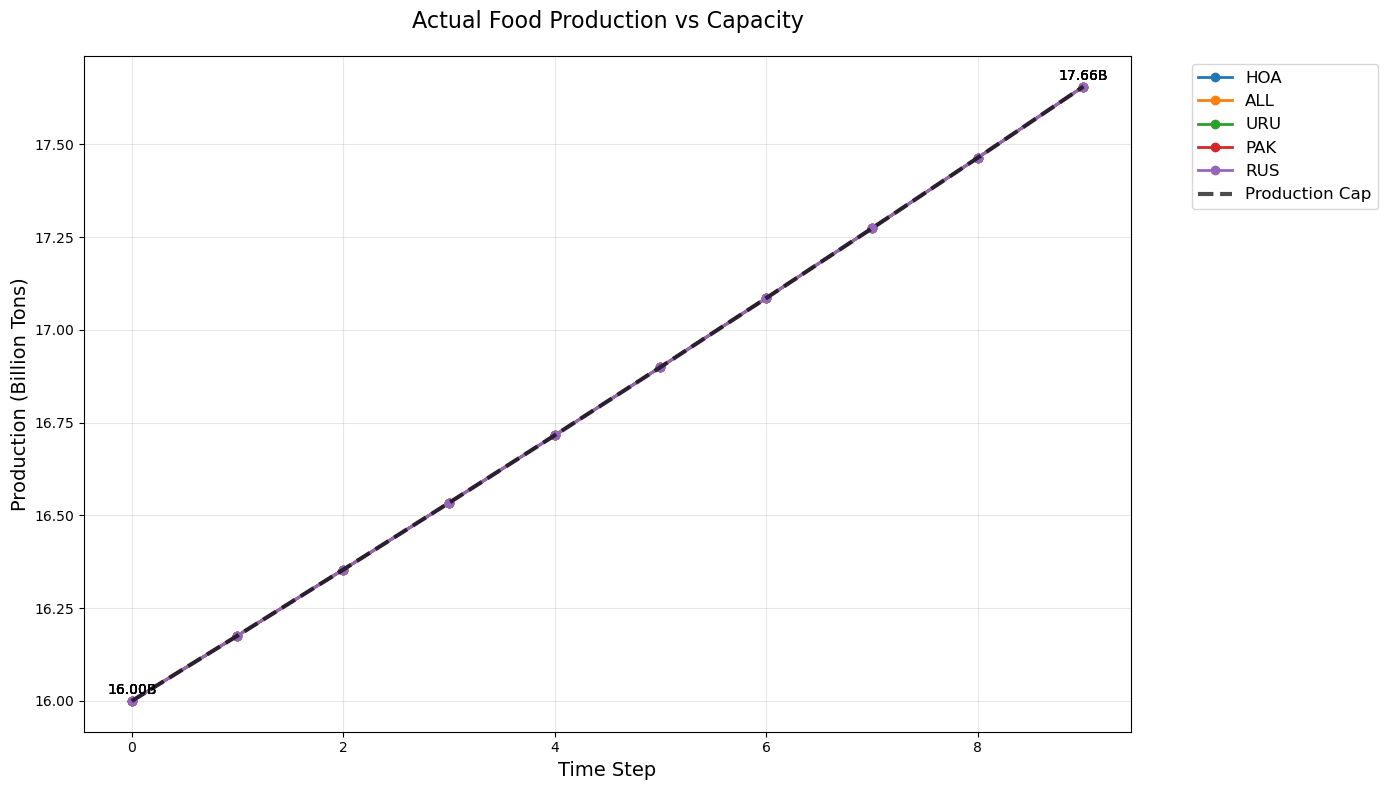

In [41]:

# Load and prepare data
data = pd.read_csv('production_overshoot.csv')

# Calculate correct actual production (account for scaling)
data['actual_production'] = np.minimum(data['total_prod'], data['cap'])

# Get unique time steps and scenarios
time_steps = data['time_step'].unique()
scenarios = data['scenario'].unique()

# Create plot
plt.figure(figsize=(14, 8))

# Plot each scenario's actual production
colors = plt.cm.tab10.colors
for i, scenario in enumerate(scenarios):
    scenario_data = data[data['scenario'] == scenario]
    plt.plot(scenario_data['time_step'], scenario_data['actual_production']/1e9,
             label=scenario, color=colors[i], marker='o', linewidth=2)

# Plot the production cap (same for all scenarios)
plt.plot(time_steps, data['cap'].unique()/1e9, 'k--', 
         label='Production Cap', linewidth=3, alpha=0.7)

# Formatting
plt.title('Actual Food Production vs Capacity', fontsize=16, pad=20)
plt.xlabel('Time Step', fontsize=14)
plt.ylabel('Production (Billion Tons)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add data labels for first and last points
for scenario in scenarios:
    scenario_data = data[data['scenario'] == scenario]
    for t in [0, max(time_steps)]:
        val = scenario_data[scenario_data['time_step'] == t]['actual_production'].values[0]/1e9
        plt.annotate(f'{val:.2f}B', 
                    (t, val), 
                    textcoords="offset points",
                    xytext=(0,5), 
                    ha='center')

plt.savefig('accurate_production_vs_cap.png', dpi=300, bbox_inches='tight')
plt.show()